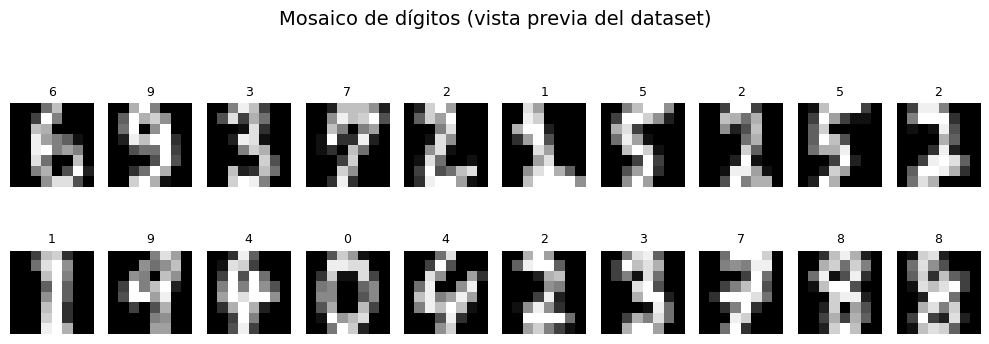

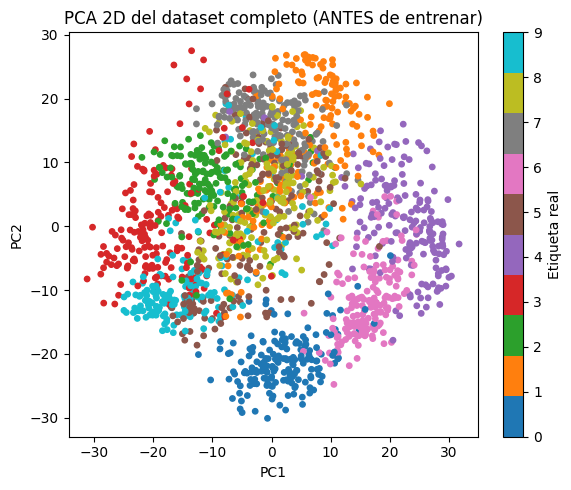

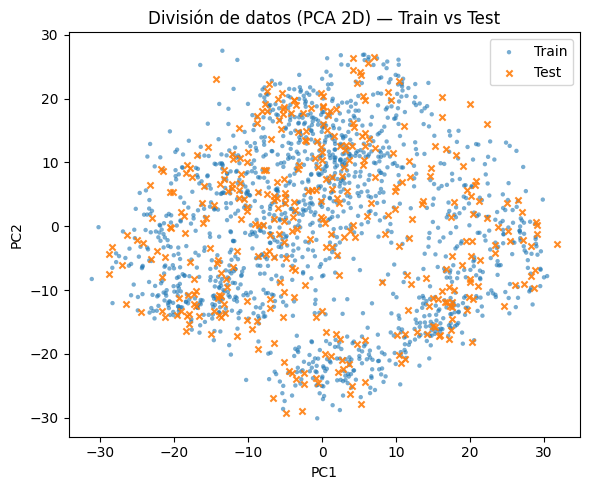

=== Métricas (Test) ===
Accuracy : 0.9694
Precision: 0.9700 (macro)
Recall   : 0.9691 (macro)
F1-score : 0.9689 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9231    1.0000    0.9600        36
           2     1.0000    1.0000    1.0000        35
           3     0.9730    0.9730    0.9730        37
           4     0.9730    1.0000    0.9863        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9231    1.0000    0.9600        36
           8     0.9375    0.8571    0.8955        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9694       360
   macro avg     0.9700    0.9691    0.9689       360
weighted avg     0.9701    0.9694    0.9692       360



<Figure size 600x500 with 0 Axes>

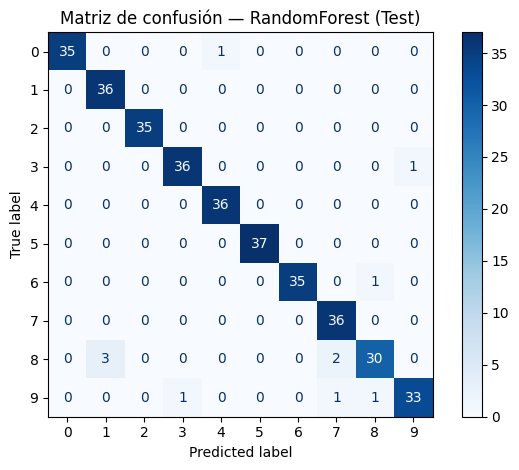

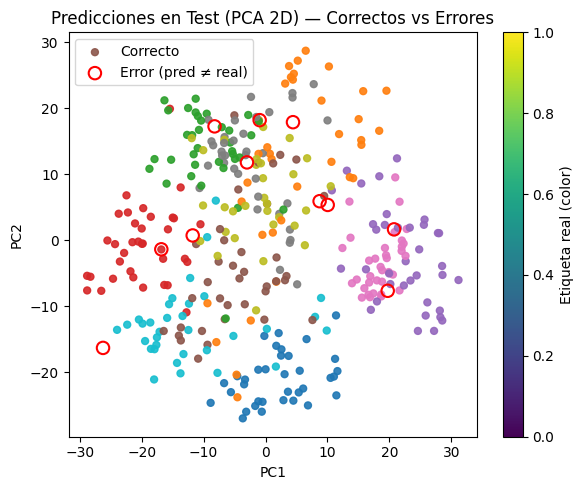

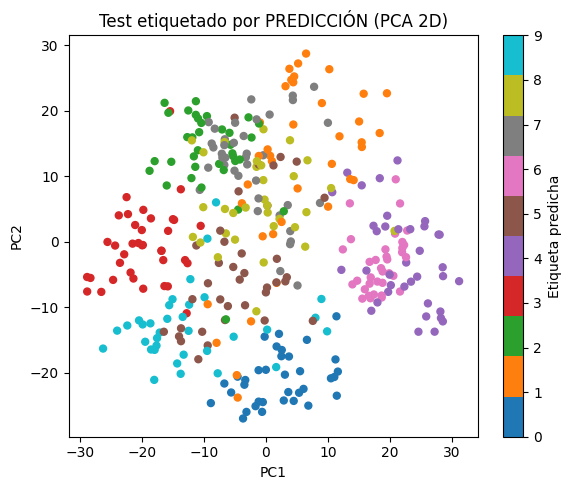

In [1]:
# =========================
# RandomForest en Digits (scikit-learn)
# =========================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(42).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=42)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=0.2, stratify=y, random_state=42
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=42)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: RandomForest ----------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — RandomForest (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=42)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()


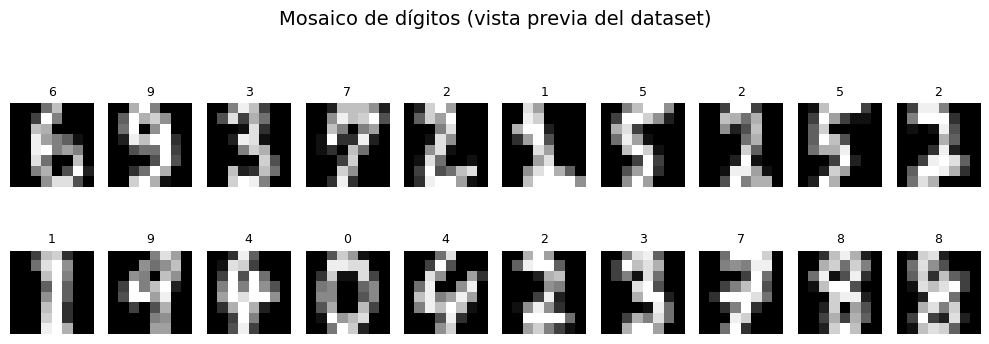

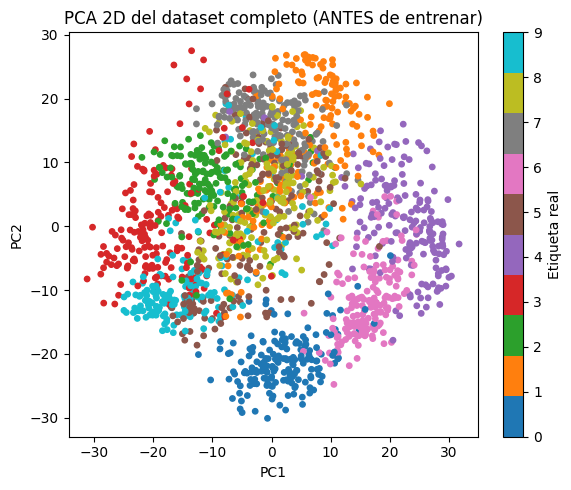

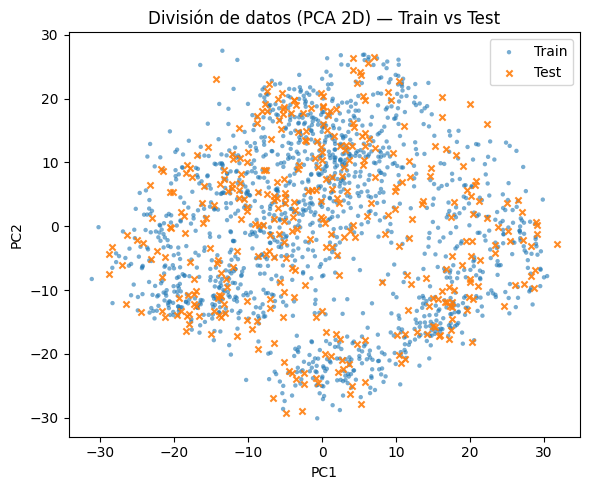

=== Métricas (Test) ===
Accuracy : 0.9694
Precision: 0.9700 (macro)
Recall   : 0.9691 (macro)
F1-score : 0.9689 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9231    1.0000    0.9600        36
           2     1.0000    1.0000    1.0000        35
           3     0.9730    0.9730    0.9730        37
           4     0.9730    1.0000    0.9863        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9231    1.0000    0.9600        36
           8     0.9375    0.8571    0.8955        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9694       360
   macro avg     0.9700    0.9691    0.9689       360
weighted avg     0.9701    0.9694    0.9692       360



<Figure size 600x500 with 0 Axes>

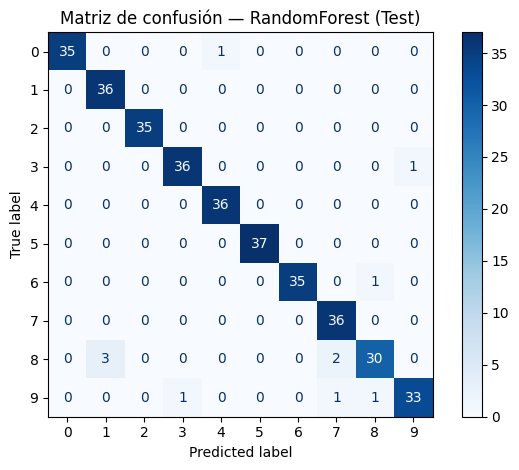

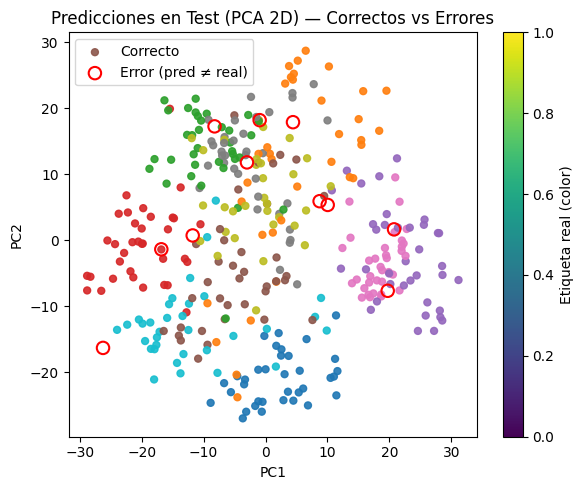

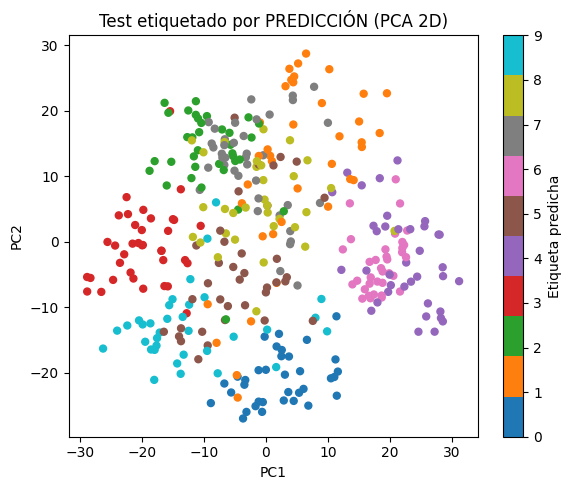

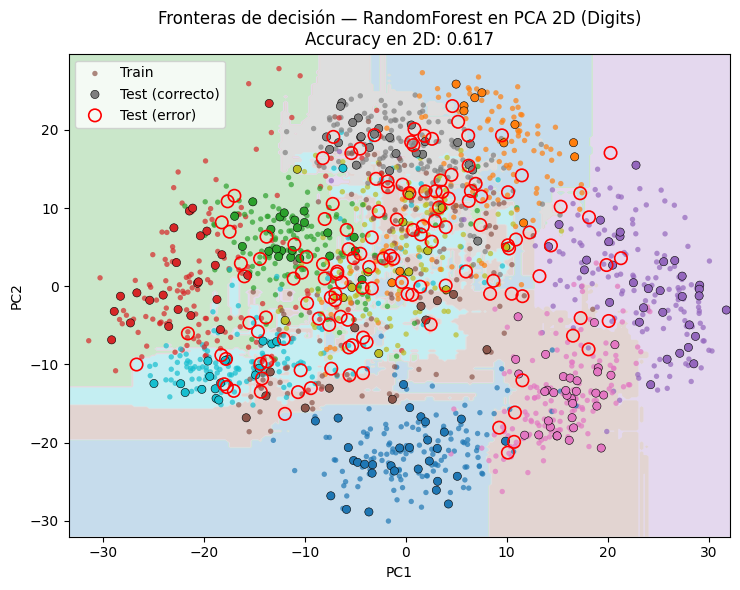

In [4]:
# =========================
# RandomForest en Digits (scikit-learn) + Fronteras de decisión
# =========================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names  # array([0,1,...,9])

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(42).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=42)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=0.2, stratify=y, random_state=42
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=42)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: RandomForest (en 64 dims) ----------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — RandomForest (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=42)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()

# ---------- 8) Fronteras de decisión en PCA 2D (cómo divide el algoritmo) ----------
# Nota: para ver fronteras en 2D, entrenamos un RF específico en las 2 componentes PCA.
pca_dec = PCA(n_components=2, random_state=42)
X_train_2d = pca_dec.fit_transform(X_train)   # ajusta PCA con TRAIN
X_test_2d  = pca_dec.transform(X_test)

rf_2d = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_2d.fit(X_train_2d, y_train)
y_pred_2d = rf_2d.predict(X_test_2d)
acc_2d = accuracy_score(y_test, y_pred_2d)

# Malla para pintar regiones
h = 0.25
x_min, x_max = X_train_2d[:, 0].min() - 2, X_train_2d[:, 0].max() + 2
y_min, y_max = X_train_2d[:, 1].min() - 2, X_train_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Colores
cmap_regions = ListedColormap(plt.cm.tab10(np.linspace(0, 1, 10)))
cmap_points  = plt.cm.tab10

correct_2d = (y_test == y_pred_2d)

plt.figure(figsize=(7.5, 6))
# Regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_regions, antialiased=True)

# Puntos TRAIN
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_points,
            s=15, alpha=0.7, edgecolors='none', label="Train")

# Puntos TEST correctos
plt.scatter(X_test_2d[correct_2d, 0], X_test_2d[correct_2d, 1],
            c=y_test[correct_2d], cmap=cmap_points, s=35,
            edgecolors='k', linewidths=0.4, label="Test (correcto)")

# Puntos TEST con error
plt.scatter(X_test_2d[~correct_2d, 0], X_test_2d[~correct_2d, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.2,
            label="Test (error)")

plt.title(f"Fronteras de decisión — RandomForest en PCA 2D (Digits)\nAccuracy en 2D: {acc_2d:.3f}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()
plt.show()


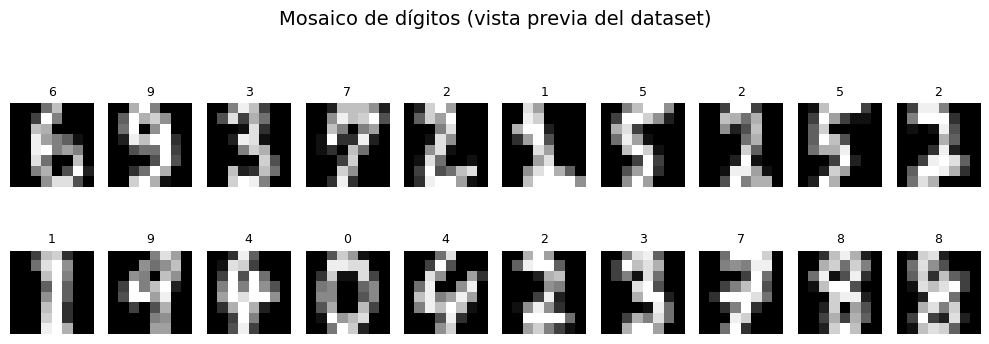

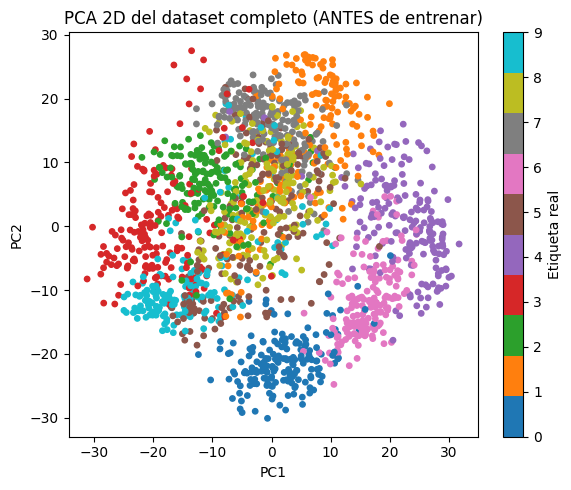

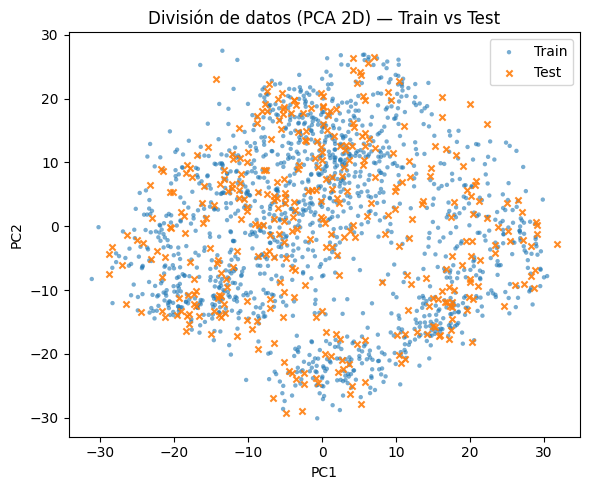

=== Métricas (Test) ===
Accuracy : 0.9667
Precision: 0.9676 (macro)
Recall   : 0.9664 (macro)
F1-score : 0.9665 (macro)

=== Classification report (por clase) ===
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9429    0.9167    0.9296        36
           2     1.0000    0.9714    0.9855        35
           3     0.9737    1.0000    0.9867        37
           4     1.0000    1.0000    1.0000        36
           5     0.9737    1.0000    0.9867        37
           6     1.0000    0.9444    0.9714        36
           7     0.9231    1.0000    0.9600        36
           8     0.8919    0.9429    0.9167        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9667       360
   macro avg     0.9676    0.9664    0.9665       360
weighted avg     0.9677    0.9667    0.9667       360



<Figure size 600x500 with 0 Axes>

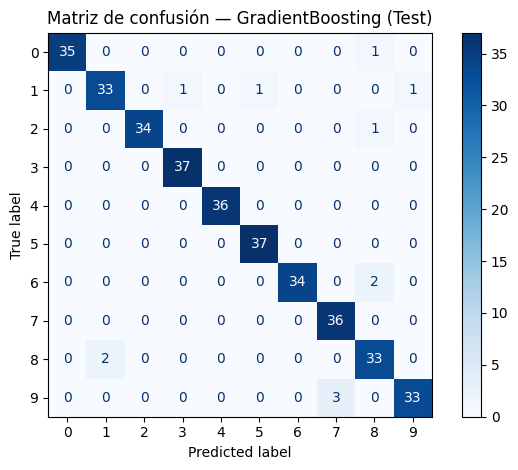

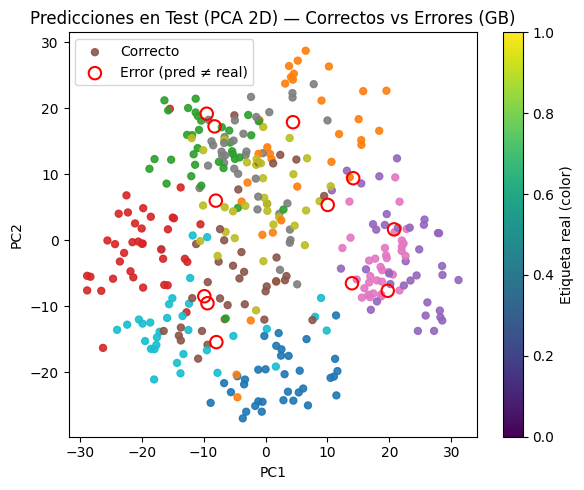

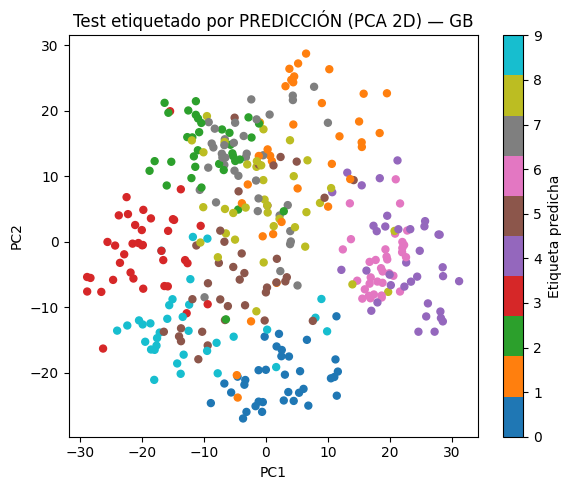

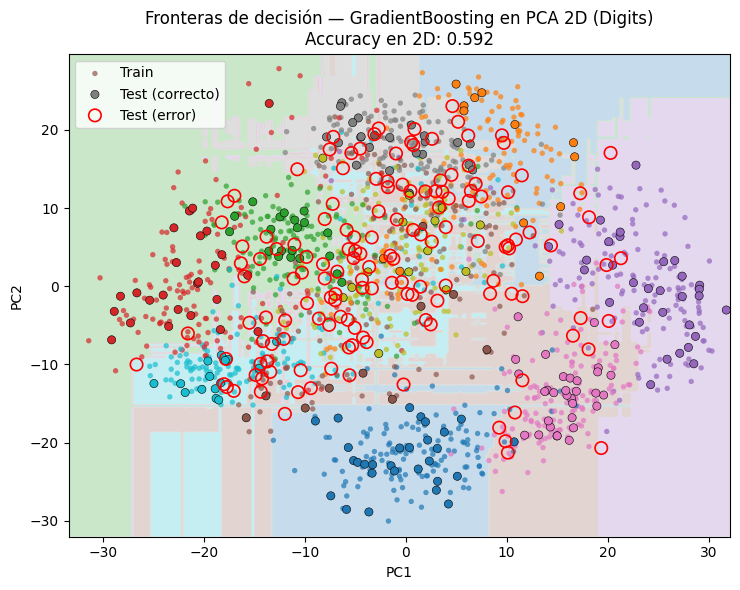

In [5]:
# =========================
# GradientBoosting en Digits (scikit-learn) + Fronteras de decisión
# =========================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# ---------- 1) Cargar dataset ----------
digits = load_digits()
X = digits.data          # (n_muestras, 64)
y = digits.target        # etiquetas 0..9
images = digits.images   # (n_muestras, 8, 8)
classes = digits.target_names  # array([0,1,...,9])

# ---------- 2) Visualización "ANTES" ----------
# 2.1 Mosaico de algunas imágenes representativas
plt.figure(figsize=(10, 4))
n_show = 20
indices = np.random.RandomState(42).choice(len(images), size=n_show, replace=False)
for i, idx in enumerate(indices, 1):
    plt.subplot(2, n_show//2, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"{y[idx]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Mosaico de dígitos (vista previa del dataset)", fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Proyección PCA 2D de TODO el dataset (coloreado por etiqueta)
pca_all = PCA(n_components=2, random_state=42)
X_pca_all = pca_all.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y, s=15, cmap="tab10")
plt.title("PCA 2D del dataset completo (ANTES de entrenar)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta real")
plt.tight_layout()
plt.show()

# ---------- 3) Split de datos ----------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(X)), test_size=0.2, stratify=y, random_state=42
)

# PCA para visualizar la división Train vs Test en el espacio 2D
pca_split = PCA(n_components=2, random_state=42)
X_pca_split = pca_split.fit_transform(X)
mask_train = np.zeros(len(X), dtype=bool); mask_train[idx_train] = True
mask_test  = np.zeros(len(X), dtype=bool); mask_test[idx_test] = True

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_split[mask_train, 0], X_pca_split[mask_train, 1],
            s=10, alpha=0.6, label="Train", edgecolors='none')
plt.scatter(X_pca_split[mask_test, 0], X_pca_split[mask_test, 1],
            s=20, alpha=0.9, label="Test", marker='x')
plt.title("División de datos (PCA 2D) — Train vs Test")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Entrenamiento: GradientBoosting (en 64 dims) ----------
gb = GradientBoostingClassifier(
    n_estimators=200,     # puedes ajustar (100-300) según tiempo/precision
    learning_rate=0.1,
    max_depth=3,         # profundidad de los árboles base
    random_state=42
)
gb.fit(X_train, y_train)

# ---------- 5) Predicciones y métricas ----------
y_pred = gb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)\n")
print("=== Classification report (por clase) ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---------- 6) Matriz de confusión ----------
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de confusión — GradientBoosting (Test)")
plt.tight_layout()
plt.show()

# ---------- 7) Visualización "DESPUÉS" ----------
# PCA del conjunto de PRUEBA para visualizar predicciones vs reales
pca_test = PCA(n_components=2, random_state=42)
X_pca_test = pca_test.fit_transform(X_test)

correct = (y_test == y_pred)
plt.figure(figsize=(6, 5))
# Puntos correctos
plt.scatter(X_pca_test[correct, 0], X_pca_test[correct, 1],
            c=y_test[correct], cmap="tab10", s=25, alpha=0.9, label="Correcto")
# Errores
plt.scatter(X_pca_test[~correct, 0], X_pca_test[~correct, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.5, label="Error (pred ≠ real)")
plt.title("Predicciones en Test (PCA 2D) — Correctos vs Errores (GB)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
cbar = plt.colorbar()
cbar.set_label("Etiqueta real (color)")
plt.tight_layout()
plt.show()

# Otra vista "después": mapa de colores por PREDICCIÓN en test
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, s=25, cmap="tab10")
plt.title("Test etiquetado por PREDICCIÓN (PCA 2D) — GB")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Etiqueta predicha")
plt.tight_layout()
plt.show()

# ---------- 8) Fronteras de decisión en PCA 2D (cómo divide el algoritmo) ----------
# Nota: para ver fronteras en 2D, entrenamos un GB específico en las 2 componentes PCA.
pca_dec = PCA(n_components=2, random_state=42)
X_train_2d = pca_dec.fit_transform(X_train)   # ajusta PCA con TRAIN
X_test_2d  = pca_dec.transform(X_test)

gb_2d = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_2d.fit(X_train_2d, y_train)
y_pred_2d = gb_2d.predict(X_test_2d)
acc_2d = accuracy_score(y_test, y_pred_2d)

# Malla para pintar regiones
h = 0.25
x_min, x_max = X_train_2d[:, 0].min() - 2, X_train_2d[:, 0].max() + 2
y_min, y_max = X_train_2d[:, 1].min() - 2, X_train_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = gb_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Colores
cmap_regions = ListedColormap(plt.cm.tab10(np.linspace(0, 1, 10)))
cmap_points  = plt.cm.tab10

correct_2d = (y_test == y_pred_2d)

plt.figure(figsize=(7.5, 6))
# Regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_regions, antialiased=True)

# Puntos TRAIN
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_points,
            s=15, alpha=0.7, edgecolors='none', label="Train")

# Puntos TEST correctos
plt.scatter(X_test_2d[correct_2d, 0], X_test_2d[correct_2d, 1],
            c=y_test[correct_2d], cmap=cmap_points, s=35,
            edgecolors='k', linewidths=0.4, label="Test (correcto)")

# Puntos TEST con error
plt.scatter(X_test_2d[~correct_2d, 0], X_test_2d[~correct_2d, 1],
            facecolors='none', edgecolors='red', s=80, linewidths=1.2,
            label="Test (error)")

plt.title(f"Fronteras de decisión — GradientBoosting en PCA 2D (Digits)\nAccuracy en 2D: {acc_2d:.3f}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()
plt.show()
